# Landau Damping

### Physical Picture

Landau damping is a phenomenon that occurs in warm plasmas when particles exchange energy with a wave.

In a warm plasma, the particles' velocity is distributed according to a maxwellian distribution, however, only the ones whose velocity is close to the phase speed of the wave will interact signifincantly though a mechanism called "trapping", described thorougly in J. D. Jackson [1].

This mechanism can be easily understood through an analogy with surfers in the sea depicted in the
image below:

<img src="drawing.png" width="800">

Both sufers are traveling at speeds close to the wave's speed, hoever, the right surfer's speed is smaller than the wave's speed, and the left surfer's speed is bigger thant the wave's speed.

This way, the right surfer gets caught and pushed by the wave, *draining energy from the wave* (damping it), and the left surfer catches the wave and pushes it, *losing energy to the wave*.

In the plasma, the thermal electrons act as the surfers that gain or lose energy, and the plasma wave acts as the sea wave.

As stated before, if the plasma is purely thermal its velocity distribution is maxellian, so there will be some electrons with velocities greater than the phase speed of the wave, and some electrons with velocities smaller than the phase speed of the wave.

<img src="cena.png" width="800">

For $v_\phi>0$ there will be more electrons with $v<v_\phi$ than electrons with $v>v_\phi$, so there will be more electrons
draining  energy from the wave than electrons giving energy to the wave and the net result is that the wave is **damped**.

### Damping rate

The Landau damping rate can be found though a kinectic analysis of the plasma, which can be followed in great detail in Francis Chen's Introduction to Plasma Physics [2].

First assume that the plasma can be accurately described by a modified distribution function:

$$ f(\mathbf{r},\mathbf{v},t)=f_0(\mathbf{v})+f_1(\mathbf{r},\mathbf{v},t)\;,\qquad \left|f_1\right|<<f_0$$

which must obey the Vlasov equation:

$$\left(\frac{\partial }{\partial t}+\mathbf{v}\cdot\nabla\right) f-\frac{q_e}{m_e}\left[\mathbf{E}+\mathbf{v}\times\mathbf{B}\right]\cdot\nabla_v f=0$$

In the case of logitudinal electrostatic  waves ($\mathbf{k}\parallel\mathbf{E}$), the linearized Vlasov equation becomes (assuming that $f_1\propto\exp{\left(ikx-iwt\right)}$):

$$i[\omega -\mathbf{k}\cdot\mathbf{v}]f_1(\mathbf{r},\mathbf{v},t)-\frac{q_e}{m_e}\mathbf{E}\cdot\nabla_\mathbf{v} f_0(\mathbf{v})=0 $$

Which together with the Poisson equation:

$$ \nabla\cdot\mathbf{E}=4\pi q_e (n_e-n_0)=4\pi q_e\int_v f_1d^3v=i\mathbf{k}\cdot\mathbf{E}$$

Allows us to get to the dispersion relation for logitudinal electrostatic waves:

$$ 1-\frac{4\pi q_e^2n_0}{m_e}\frac{\mathbf{k}}{k^2}\cdot\int_v\frac{\nabla_\mathbf{v}f_0/n_0}{\omega-\mathbf{k}\cdot\mathbf{v}}d^3v=1-\frac{\omega_p^2\mathbf{k}}{k^2}\cdot\int_v\frac{\nabla_\mathbf{v}f_0/n_0}{\omega-\mathbf{k}\cdot\mathbf{v}}d^3v=0$$

Which can be solved to find $\omega$, which has an imaginary component:

$$
\begin{align}
\omega&=\omega_r+i\omega_i\\
&=\sqrt{\omega_p^2+3v_{th}^2k^2}+i\pi\frac{\omega_p^3}{2k^2} \frac{\partial f_0/n_0}{\partial v} \biggr|_{v=v_\phi}
\end{align}
$$

The damping rate $\gamma$ is then given by:

$$\gamma=\pi\frac{\omega_p^3}{2k^2} \frac{\partial f_0/n_0}{\partial v} \biggr|_{v=v_\phi} $$

and the wave decays as $\propto\exp{(-\gamma t)}$

### A few remarks about simulations

Landau damping is an electrostatic phenomenon, so we will not need to use the electromagnetic version of ZPIC, instead, we will use the **electrostatic version**.

It is highly important  to have a *very well represented* maxwellian distribution, so that a high number of particles are able to interact with the wave. This way, the  PIC simulation will be populated with a **high density species** of thermal electrons. <br>
Having a high number of particles will also help avoid *numerical heating*, a non-physical simulation artifact that will be explained in the last section.

As suggested in Birdsall and Langdon's Plasma Physics via Computer Simulations [3], it is a good idea to add some *low density, low charge* **marker species** to track the evolution of the system in phase space

### Running the simulation

Before running the simulation, check if the phase speed of the wave is represented by the velocity distribution

In [49]:
import numpy as np

#insert you value for the wave number
k=3

#insert the desired thermal velocity

vth=0.27/np.sqrt(3)
wp=1
vf=np.sqrt(wp**2+3*k**2*vth**2)/k


if vf<3*vth:
    print("v_phase=",vf,"; 3vth=",3*vth,"There will be particles interacting with the wave!")
else:
    print("v_phase=",vf,"; 3vth=",3*vth,"There will not be particles interacting with the wave!")

v_phase= 0.42896516305069715 ; 3vth= 0.46765371804359696 There will be particles interacting with the wave!


In [50]:
import es1d


# Simulation box
nx  = 1024
box = 4*np.pi

# Time step
dt = 0.99*box/nx
tmax = 50.8

# Diagnostic frequency
ndump = 5

# Custom density profile for the wave species
def custom_n0(x):
    return 1.0 + 0.06*np.sin(k*x)

ppc = 1 # Particles per cell
density = es1d.Density( type = es1d.DensityType.custom, custom = custom_n0 )
#electrons = es1d.Species( "electrons", -1.0, 1*ppc,density=density)
speclst=[]

#Thermal plasma species
plsm= es1d.Species( "plsm", -1.0, 512*ppc,vth=vth,density=density)
speclst.append(plsm)

#marker species with fluid speeds close to the phase pseed o the wave
density2 = es1d.Density( type = es1d.DensityType.uniform )
density2.n=0.0001
marker1= es1d.Species( "marker1", -1.0, 16*ppc,vfl=vf/0.9,density=density2)
speclst.append(marker1)
marker2= es1d.Species( "marker2", -1.0, 16*ppc,vfl=vf,density=density2)
speclst.append(marker2)
marker3= es1d.Species( "marker3", -1.0, 16*ppc,vfl=vf*8/9,density=density2)
speclst.append(marker3)


E1=[]
m1=[]   
m2=[]   
m3=[]   
# Initialize simulation data
sim = es1d.Simulation( nx, box, dt, species=speclst)     
b=plsm.particles
vel=[]

for i,part in enumerate(b):
    x=(part["x"]+part["ix"])*box/nx    
    b["vx"][i]=b["vx"][i]+0.06*np.sin(k*x)/k

In [51]:
while sim.t < tmax:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    #store the electron trajectories
    if sim.n%5==0:        
        m1.append(marker1.particles[:].copy())
        m2.append(marker2.particles[:].copy())
        m3.append(marker3.particles[:].copy())

    #store the positron(ish) trajectories
    #pos_part_rep.append(positives.particles[40].copy())
    E1.append(sim.field.E.copy())
    sim.iter()


### Checking the results

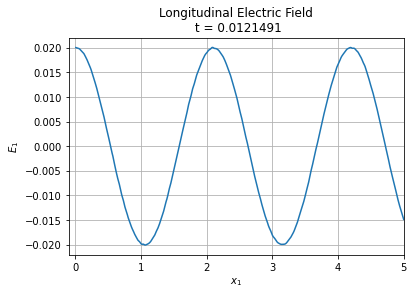

In [45]:
import matplotlib.pyplot as plt

# Plot field values at the center of the cells
xmin = sim.field.dx/2
xmax = sim.field.box - sim.field.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.field.nx), E1[1] )
plt.xlabel("$x_1$")
plt.ylabel("$E_1$")
plt.title("Longitudinal Electric Field\n t = {:g}".format(dt*1))
plt.xlim(-0.1,5)
plt.grid(True)

plt.show()

By runnig the following cell, you are able to visualize the fourier transform of the E-field

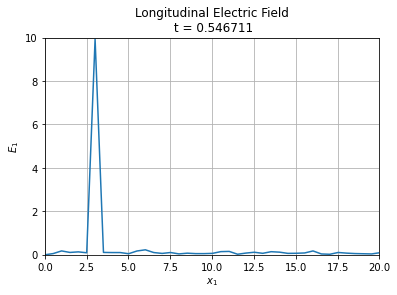

In [62]:
import matplotlib.pyplot as plt
import scipy.fftpack
# Plot field values at the center of the cells
xmin = sim.field.dx/2
xmax = sim.field.box - sim.field.dx/2
xax=np.linspace(xmin, xmax, num = sim.field.nx)


# Number of samplepoints
full_N = len(xax)
# sample spacing
full_T = xax[1]-xax[0]

full_yf = scipy.fftpack.fft(E1[45])
xf = np.linspace(0, 1.0/(2.0*full_T), int(full_N/2))*2*np.pi

plt.plot(xf, np.abs(full_yf[:full_N//2]) )
plt.xlabel("$x_1$")
plt.ylabel("$E_1$")
plt.title("Longitudinal Electric Field\n t = {:g}".format(dt*45))
plt.grid(True)
plt.ylim(-0.01,10)
plt.xlim(-0.01,20)
plt.show()

And you may also produce a video by runnig the following cell, advance it in time using the slider to see the wave being damped !

In [63]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display
import ipywidgets

# Create progress bar
label = ipywidgets.HTML()
display(label)

# Create plot
fig, ax = plt.subplots()
fig.set_size_inches( (8,6.0) )

(p1,) = ax.plot([], [])
ax.set_xlabel("k1 [$\omega_p/c$]")
ax.set_ylabel("FFT E1")
ax.set_title("u1-x1 phasespace\nt = {:.1f}".format(sim.t))
ax.grid(True)

# creating x axis
full_N = len(xax)
full_T = xax[1]-xax[0]
xf = np.linspace(0, 1.0/(2.0*full_T), int(full_N/2))*2*np.pi

ax.set_xlim( (0,20 ))
ax.set_ylim( (-0.01, 10) )
plt.close(fig)

def animate(i):
    label.value = "Generating frame {:d}/{:d} ...".format(i+1,sim.n//5)
    
    full_yf = np.abs(scipy.fftpack.fft(E1[i*5]))
    p1.set_xdata(xf)
    p1.set_ydata(full_yf[:full_N//2])

    ax.set_title(r"Simulation time {:.1f}".format(dt*i*10)+" [$\omega_p^{-1}$]")

    return (p1,)

# Create the movie
anim = animation.FuncAnimation( fig, animate, frames = sim.n//5, repeat = False, blit = True, interval = 1000.0/32 )
movie = ipywidgets.HTML(anim.to_html5_video())

# Show the completed movie
label.value = "Done!"
display(movie)

HTML(value='')

HTML(value='<video width="576" height="432" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4…

##### Damping rate comparision

The following tool tracks the amplitude of the wave the specified $k$ in time. You can use it to check if the damping rate matches the theoretical expectations

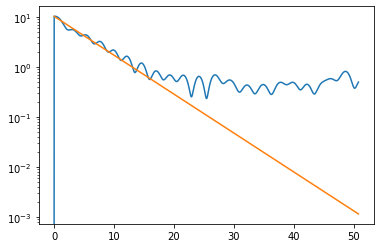

In [59]:
# Number of samplepoints
full_N = len(xax)
# sample spacing
full_T = xax[1]-xax[0]
xf = np.linspace(0, 1.0/(2.0*full_T), int(full_N/2))*2*np.pi

z1=[((x>k-0.3) and (x<k+0.3)) for x in xf]
p1=[]
for fld in E1[:]:
    fft=np.abs(scipy.fftpack.fft(fld))[:full_N//2]
    p1.append(np.sum(fft[z1]))

t=np.linspace(0,sim.t,sim.n)
    
#compute the derivative of the distribution function
dfdv=-(vf)/(np.sqrt(2*np.pi)*(vth)**3)*np.exp(-((vf/vth)**2)/2)
gamma=dfdv*np.pi*1**3/k**2/2


plt.semilogy(t,p1)
plt.semilogy(t,p1[1]*np.exp(gamma*t))

##### Particle mixing

As particles exchange energy with the wave, their velocity either increases (if it is initially smaller than $v_\phi$)  or decreases (if it is initially greater than $v_\phi$).

This way, if we track  these particles in phase space we will see that after some time, species
with initially distinct velocities will start getting mixed.

For this reason, we tracked 3 marker species with velocities close to the phase speed: $v_1=0.9v_\phi$, $v_2=v_\phi$, $v_3=1.1v_\phi$ 

You can use the following tool to verify that after some time the different species start to mix

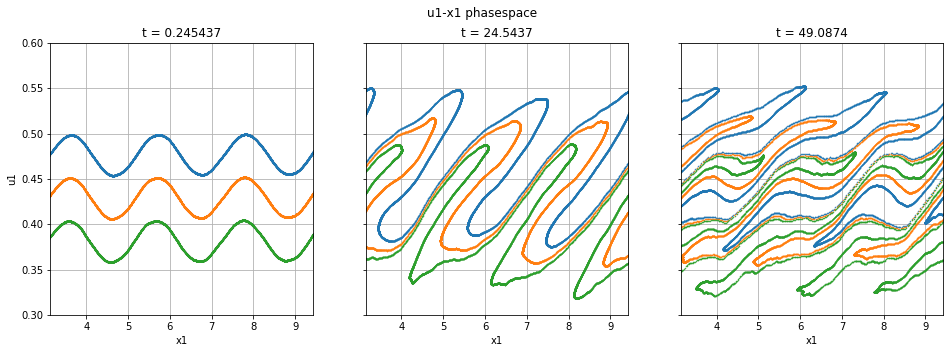

In [57]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s['ix'] + s['x']) * sim.dx 


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

tstep=20
axes[0].plot(x(m1[tstep]),  m1[tstep]['vx'],  '.', ms = 1)
axes[0].plot(x(m2[tstep]),  m2[tstep]['vx'],  '.', ms =1)
axes[0].plot(x(m3[tstep]),  m3[tstep]['vx'],  '.', ms = 1)
axes[0].set_title("t = {:g}".format(sim.dx*tstep))

tstep=400
axes[1].plot(x(m1[tstep]),  m1[tstep]['vx'],  '.', ms = 1)
axes[1].plot(x(m2[tstep]),  m2[tstep]['vx'],  '.', ms =1)
axes[1].plot(x(m3[tstep]),  m3[tstep]['vx'],  '.', ms = 1)
axes[1].set_yticklabels([])
axes[1].set_title("t = {:g}".format(sim.dx*tstep*5))

tstep=800
axes[2].plot(x(m1[tstep]),  m1[tstep]['vx'],  '.', ms = 1)
axes[2].plot(x(m2[tstep]),  m2[tstep]['vx'],  '.', ms =1)
axes[2].plot(x(m3[tstep]),  m3[tstep]['vx'],  '.', ms = 1)
axes[2].set_yticklabels([])
axes[2].set_title("t = {:g}".format(sim.dx*tstep*5))


for ax in axes:
    ax.set_xlabel("x1")
    ax.set_xlim(np.pi,3*np.pi)
    ax.set_ylim(0.3,0.6)
    ax.grid()
    
axes[0].set_ylabel("u1")
fig.suptitle("u1-x1 phasespace")
plt.show()

In [83]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display
import ipywidgets

# Create progress bar
label = ipywidgets.HTML()
display(label)

# Create plot
fig, ax = plt.subplots()
fig.set_size_inches( (8,6.0) )

# Simple function to convert particle positions
x = lambda s : (s['ix'] + s['x']) * sim.dx 


(p1,) = ax.plot([], [],  '.', ms = 1)
(p2,) = ax.plot([], [],  '.', ms = 1)
(p3,) = ax.plot([], [],  '.', ms = 1)
ax.set_xlabel("k1 [$\omega_p/c$]")
ax.set_ylabel("FFT E1")
ax.set_title("u1-x1 phasespace\nt = {:.1f}".format(sim.t))
ax.grid(True)


ax.set_xlim(2*np.pi,3*np.pi)
ax.set_ylim(0.065,0.105)

plt.close(fig)

def animate(i):
    label.value = "Generating frame {:d}/{:d} ...".format(i+1,sim.n//5)
    
    p1.set_xdata(x(m1[i]))
    p1.set_ydata(m1[i]['vx'])
    p2.set_xdata(x(m2[i]))
    p2.set_ydata(m2[i]['vx'])
    p3.set_xdata(x(m3[i]))
    p3.set_ydata(m3[i]['vx'])

    ax.set_title(r"Simulation time {:.1f}".format(dt*i)+" [$\omega_p^{-1}$]")

    return (p1,p2,p3)

# Create the movie
anim = animation.FuncAnimation( fig, animate, frames = sim.n//5, repeat = False, blit = True, interval = 1000.0/32 )
movie = ipywidgets.HTML(anim.to_html5_video())

# Show the completed movie
label.value = "Done!"
display(movie)

HTML(value='')

HTML(value='<video width="576" height="432" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4…

### Refrences

[1] Jonh D. Jackson. *Classical Electrodynamics*, Wiley, 3rd edition, 1999.

[2] Francis F. Chen. *Introduction to Plasma Physics*, Plenum Press, 2nd edition, 1984

[3] C. K. Birdsall and A. B. Langdon. *Plasma Physics via Computer Simulations*, Adam Hilger, 3rd edition 1991